# Wine quality analysis

In [1]:
# We work out an example to analyse the wine quality.
# Wine quality is classified into 8 classes, where it 
# relates to a number of factors such as the density and
# pH value, etc.
#
# Our analysis can be divided into two problems. One is 
# to predict the wine quality by using regression. We demonstrate
# the linear regression method, Ridge and the support vector 
# regressor, respectively.

# Another one is to predict the good and bad wine by dividing the 
# wind quality into two classes. The problem becomes the 
# binary classification problem. We solve this problem by using
# the logistic regression method.
# 
# The data set can be downloaded from the kaggle website below:
# https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

In [2]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv("winequality-red.csv")

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Splitting data into training and testing sets

In [6]:
X=df.values[:,:-1]
y=df.values[:,-1]

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=21)

# Regression

In [9]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
from sklearn.linear_model import Ridge

In [10]:
# Let's study the problem using Ridge method 

In [11]:
steps=[('scale',StandardScaler()),('clf',Ridge())]
pipeline=Pipeline(steps)

In [12]:
# Using GridSearchCV to choose the best parameter, alpha 

In [13]:
param_grid={'clf__alpha':np.arange(1,100,1)}

In [14]:
clf_cv=GridSearchCV(pipeline,param_grid)

In [15]:
clf_cv.fit(X_train,y_train)

GridSearchCV(cv=None, error_score='raise',
       estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))]),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'clf__alpha': array([ 1,  2, ..., 98, 99])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [16]:
# The best parameter of alpha
clf_cv.best_params_

{'clf__alpha': 80}

In [17]:
# The resulting prediction of wine quality returns 
# a non-integer. We approximate the results by using
# the ceiling function from numpy.

In [18]:
# We calculate the RMSE between the data set and
# prediction after the approximation.
from sklearn.metrics import mean_squared_error
y_pred=np.ceil(clf_cv.predict(X_train))
rmse=np.sqrt(mean_squared_error(y_train,y_pred))
print("RMSE of training set is {}.".format(rmse))
y_pred=np.ceil(clf_cv.predict(X_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE of testing set is {}.".format(rmse))

RMSE of training set is 0.8917132178349778.
RMSE of testing set is 0.9168560410446124.


In [19]:
# Next we study the support vector regressor.

In [20]:
from sklearn.svm import SVR
steps=[('scale',StandardScaler()),('clf',SVR())]
pipeline=Pipeline(steps)

In [21]:
param_dist={'clf__C':np.arange(1,1000)/500,'clf__gamma':[1e-3,5e-3,1e-2,5e-2,1e-1,0.5,1]}

In [22]:
# Here RandomizedSearchCV is more efficient
clf_cv=RandomizedSearchCV(pipeline,param_dist)

In [23]:
clf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='auto',
  kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'clf__C': array([ 0.002,  0.004, ...,  1.996,  1.998]), 'clf__gamma': [0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [24]:
# The best parameters of SVR(gamma and C)
print(clf_cv.best_params_)

{'clf__gamma': 0.01, 'clf__C': 1.3919999999999999}


In [25]:
# RMSEs of data and prediction
y_pred=np.ceil(clf_cv.predict(X_train))
rmse=np.sqrt(mean_squared_error(y_train,y_pred))
print("RMSE of training set is {}.".format(rmse))
y_pred=np.ceil(clf_cv.predict(X_test))
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
print("RMSE of testing set is {}.".format(rmse))

RMSE of training set is 0.8577476551264377.
RMSE of testing set is 0.8605957239029253.


# Binary Classification

In [26]:
# We divide the wine into the good and bad one. 
# If the wine quality is equal to and larger than 7
# then it is said to be good. Otherwise, it is bad.
# We study this classification problem by using
# logistic regression method.

In [27]:
# We define the function to classify the wind into the 
# cases of good and bad wine.
def goodbad(x):
    if x>=7:
        x=1 # good
    else:
        x=0 # bad
    return x

In [28]:
goodbad_func=np.vectorize(goodbad)

In [29]:
y_train=goodbad_func(y_train)
y_test=goodbad_func(y_test)

In [30]:
# Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression
steps=[('scale',StandardScaler()),('clf',LogisticRegression())]
pipeline=Pipeline(steps)

In [32]:
param_dist={'clf__C':np.arange(1,2000)/500}

In [33]:
clf_cv=RandomizedSearchCV(pipeline,param_dist)

In [34]:
clf_cv.fit(X_train,y_train)

RandomizedSearchCV(cv=None, error_score='raise',
          estimator=Pipeline(memory=None,
     steps=[('scale', StandardScaler(copy=True, with_mean=True, with_std=True)), ('clf', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False))]),
          fit_params=None, iid=True, n_iter=10, n_jobs=1,
          param_distributions={'clf__C': array([  2.00000e-03,   4.00000e-03, ...,   3.99600e+00,   3.99800e+00])},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [35]:
# The best parameter of Logistic Regression
clf_cv.best_params_

{'clf__C': 2.7839999999999998}

In [36]:
print("Score of training set is {}".format(clf_cv.score(X_train,y_train)))
print("Score of testing set is {}".format(clf_cv.score(X_test,y_test)))

Score of training set is 0.8795934323690383
Score of testing set is 0.88125


In [37]:
# Prediction of y 
y_pred=clf_cv.predict(X_test)

In [38]:
# Performance Evaluation

In [39]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve

In [40]:
# Classification Report 
print(classification_report(y_test,y_pred,target_names=['bad','good']))

             precision    recall  f1-score   support

        bad       0.90      0.97      0.93       275
       good       0.64      0.36      0.46        45

avg / total       0.86      0.88      0.87       320



In [41]:
# Confusion matrix
print(confusion_matrix(y_test,y_pred))

[[266   9]
 [ 29  16]]


In [42]:
# Probability of the good wine
y_pred_prob=clf_cv.predict_proba(X_test)[:,1]

In [43]:
# Plot of ROC curve
import matplotlib.pyplot as plt
fpr,tpr, thresholds=roc_curve(y_test,y_pred_prob)

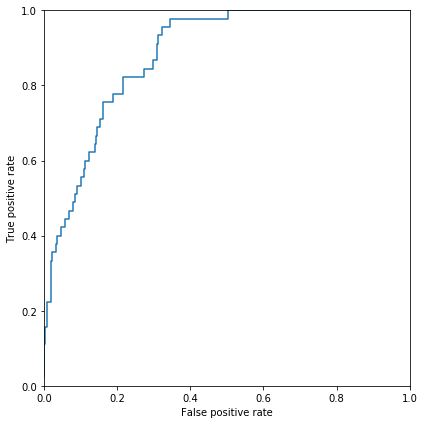

In [44]:
plt.figure(figsize=(6,6))
plt.plot(fpr,tpr)
plt.xlim(xmax=1,xmin=0)
plt.ylim(ymax=1,ymin=0)
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.tight_layout()
plt.show()

In [45]:
# Area under ROC curve
roc_auc_score(y_test,y_pred_prob)

0.88274747474747473